# this notebook will test basic Autoregression predictions as well as the already built in simpleRNN 

# import

In [34]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GlobalMaxPool1D

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# load/create the data

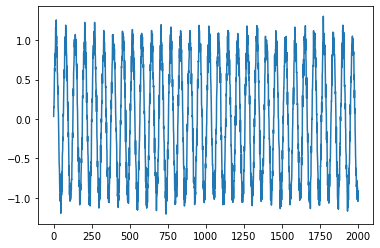

In [2]:
# first test will use generated sine wave with some noise
data = np.sin(0.1 * np.arange(2000)) + np.random.randn(2000) * 0.1
plt.plot(data)
plt.show()

# prepare data

In [4]:
'''
to use data for time series prediction it should be in shame N x T x D WHERE:

N number of samples
T time steps to use/ past data
D number of features on each time step

'''

# note : to make x/y pair for example it T=10 then from data[0:10]are x and data[10] is y then increment by one and so on
features = []
labels = []
T= 24
for i in range(len(data)- T):
  x = data[i:i+T]
  y = data[i+T]
  features.append(x)
  labels.append(y)

features = np.array(features)
labels = np.array(labels)
labels = labels.reshape(-1,1)

print(f'features shape : {features.shape}')
print(f'labels shape : {labels.shape}')

  


features shape : (1976, 24)
labels shape : (1976, 1)


# train basic linear regression model

In [5]:
backend.clear_session() 
i = Input(shape=T)
x = Dense(1)(i) # dense layer without activation(defaul) means regression problem

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.1),loss='mse')
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None


# train the model

In [6]:
h = model.fit(features[0:1200],labels[0:1200], epochs=80, validation_data=(features[1200:],labels[1200:]))

Epoch 1/80
38/38 [==============================] - 1s 12ms/step - loss: 0.2859 - val_loss: 0.0214
Epoch 2/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0238
Epoch 3/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.0364
Epoch 4/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0226
Epoch 5/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.0396
Epoch 6/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.0128
Epoch 7/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0197
Epoch 8/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0233
Epoch 9/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0146
Epoch 10/80
38/38 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0189
Epoch 11/80
38/38 

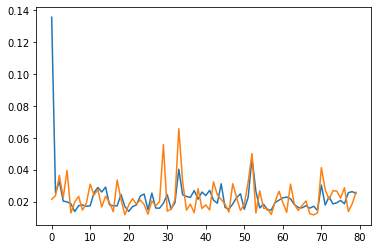

In [7]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

# Make prediction using correct and wrong methods.


### wrong prediction method is using correct validation data to make predictions
### whilst correct method is taking the previous prediction and considering it as x(t-1)


In [8]:
# "Wrong" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input

while len(predictions) < len(targets):
  feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  i += 1

  predictions.append(pred)

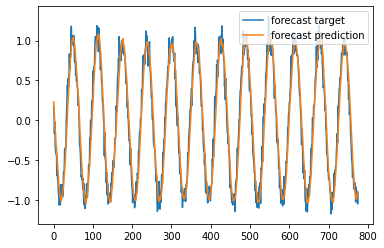

In [9]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

In [10]:
# "right" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input
feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
# feat will be change to add the prediction as we loop ex feat = [1,2,3] >- pred=5. ==> feat= [2,3,5] and so on

while len(predictions) < len(targets):
  
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  predictions.append(pred)
  # shift left and replace oldest element by prediction
  feat = np.roll(feat,-1)
  feat[-1] = pred # oldest element will be last after shifting
  

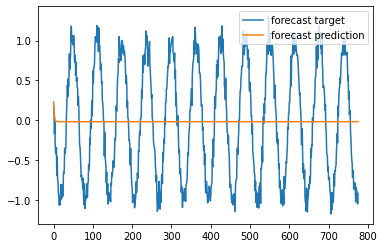

In [11]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

# new model using simple RNN

In [12]:
# new model using simple RNN
backend.clear_session() 
i = Input(shape=(T,1))
x = SimpleRNN(4,activation='relu',return_sequences=False)(i) 
x = Dense(1)(x) # dense layer without activation(defaul) means regression problem

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.01),loss='mse')
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 4)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
h = model.fit(features[0:1200],labels[0:1200], epochs=100, validation_data=(features[1200:],labels[1200:]))

Epoch 1/100
38/38 [==============================] - 1s 11ms/step - loss: 0.4703 - val_loss: 0.1604
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1298 - val_loss: 0.0673
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0542 - val_loss: 0.0412
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.0310
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.0271
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0267 - val_loss: 0.0252
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0239 - val_loss: 0.0245
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.0254
Epoch 9/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0265 - val_loss: 0.0235
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.0232
Epoch 11

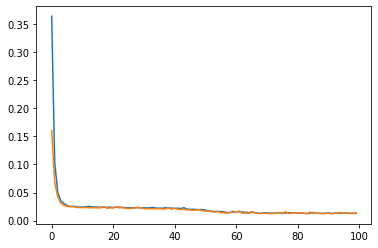

In [14]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

#Make prediction using correct and wrong methods.

####wrong prediction method is using correct validation data to make predictions

####whilst correct method is taking the previous prediction and considering it as x(t-1)

In [ ]:
# "Wrong" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input

while len(predictions) < len(targets):
  feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  i += 1

  predictions.append(pred)

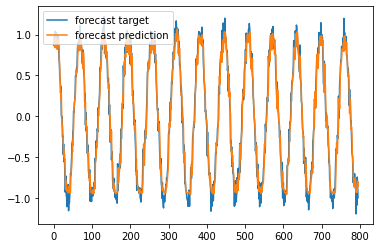

In [ ]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

In [ ]:
# "right" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input
feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
# feat will be change to add the prediction as we loop ex feat = [1,2,3] >- pred=5. ==> feat= [2,3,5] and so on

while len(predictions) < len(targets):
  
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  predictions.append(pred)
  # shift left and replace oldest element by prediction
  feat = np.roll(feat,-1)
  feat[-1] = pred # oldest element will be last after shifting
  

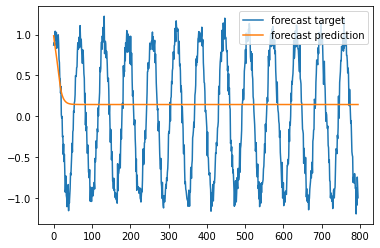

In [ ]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

# LSTM model

In [50]:
# new model using simple RNN
backend.clear_session() 

i = Input(shape=(T,1))
x = LSTM(24,return_sequences=True)(i)
x = GlobalMaxPool1D()(x) # to used this layer return sequence needs to be True
x = Dense(1)(x)

model = Model(i,x)
model.compile(optimizer=Adam(lr=0.01),loss='mse')
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 24, 24)            2496      
_________________________________________________________________
global_max_pooling1d (Global (None, 24)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25        
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
h = model.fit(features[0:1200],labels[0:1200], epochs=100, validation_data=(features[1200:],labels[1200:]))

Epoch 1/100
38/38 [==============================] - 3s 23ms/step - loss: 0.3082 - val_loss: 0.0289
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.0138
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0136 - val_loss: 0.0119
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0128 - val_loss: 0.0191
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0135 - val_loss: 0.0150
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 0.0146
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0127 - val_loss: 0.0113
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0123 - val_loss: 0.0138
Epoch 10/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0132 - val_loss: 0.0147

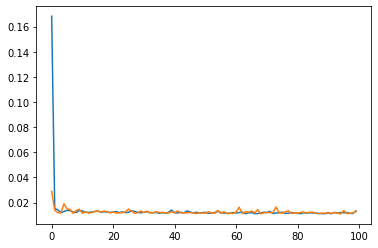

In [52]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

#Make prediction using correct and wrong methods.

####wrong prediction method is using correct validation data to make predictions

####whilst correct method is taking the previous prediction and considering it as x(t-1)

In [53]:
# "Wrong" forecast using true targets. 

targets = labels[1200:]
predictions = []
i = 1200 # first validation input

while len(predictions) < len(targets):
  feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  i += 1

  predictions.append(pred)

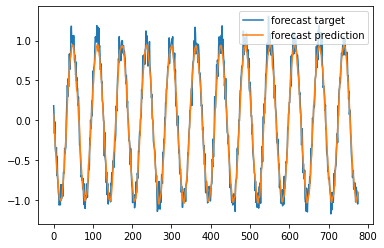

In [54]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()

In [57]:
# "right" forecast using true targets

targets = labels[1200:]
predictions = []
i = 1200 # first validation input
feat = features[i].reshape(1, -1) # reshape to 1,T where 1 is N here
# feat will be change to add the prediction as we loop ex feat = [1,2,3] >- pred=5. ==> feat= [2,3,5] and so on

while len(predictions) < len(targets):
  
  # predict method  takes N,shape, we can insert all data at once and make prediction, but we are using a loop for one example at a time
  # to compare it with true(right) prediction methods later which needs incremental predictions to take old predictions into account
  pred = model.predict(feat)[0,0] # 1x1 array -> scalar
  predictions.append(pred)
  # shift left and replace oldest element by prediction
  feat = np.roll(feat,-1)
  feat[-1] = pred # oldest element will be last after shifting
  

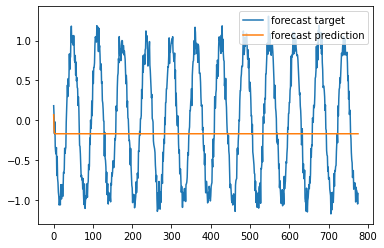

In [58]:
plt.plot(targets, label='forecast target')
plt.plot(predictions, label='forecast prediction')
plt.legend()